In [3]:
# import necessary libraries
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('laptops.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
list(df.columns)

['laptop',
 'status',
 'brand',
 'model',
 'cpu',
 'ram',
 'storage',
 'storage_type',
 'gpu',
 'screen',
 'touch',
 'final_price']

In [43]:
selected_columns = ['ram','storage','screen','final_price']
df = df[selected_columns]
df

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


In [45]:
# !pip install matplotlib seaborn

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='final_price', ylabel='Count'>

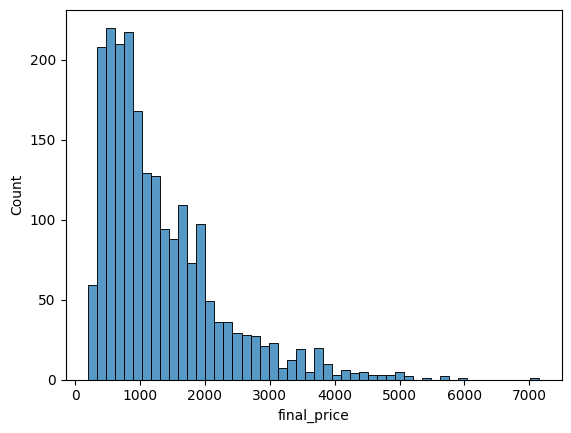

In [47]:
sns.histplot(df.final_price, bins=50)

In [48]:
# Question 1

In [49]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [50]:
# Question 2

In [51]:
df['ram'].median()

16.0

In [52]:
# Question 3

In [53]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [54]:
n_val, n_test, n_train, n

(432, 432, 1296, 2160)

In [55]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [56]:
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

In [57]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [58]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [59]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [60]:
# Fill missing values with 0
df_train_0 = df_train.fillna(0)
df_val_0 = df_val.fillna(0)
df_test_0 = df_test.fillna(0)

In [61]:
y_train_0 = np.log1p(df_train_0.final_price.values)
y_val_0 = np.log1p(df_val_0.final_price.values)
y_test_0 = np.log1p(df_test_0.final_price.values)

In [62]:
y_train_0

array([7.024907  , 5.30851519, 6.90649448, ..., 6.96602419, 7.42177579,
       6.96318999])

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [64]:
base = ['ram','storage','screen']
X_train_0 = df_train_0[base].values

w0, w = train_linear_regression(X_train_0, y_train_0)

y_pred_0 = w0 + X_train_0.dot(w)

In [65]:
y_pred_0

array([7.65966079, 6.35973416, 7.71809133, ..., 6.91648826, 6.9749188 ,
       6.9749188 ])

In [66]:
w0, w

(6.7271637061124805, array([ 0.02630589,  0.00066041, -0.03651909]))

<Axes: ylabel='Count'>

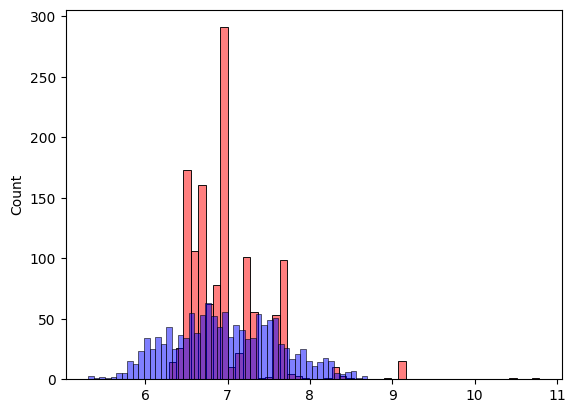

In [78]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_0, color='blue', alpha=0.5, bins=50)

In [80]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [81]:
rmse(y_train_0, y_pred_0).round(2)

0.45

In [82]:
# Fill missing values with the mean
mean_storage = df_train['storage'].mean()

df_train_mean = df_train.fillna({'storage': mean_storage})
df_val_mean = df_val.fillna({'storage': mean_storage})
df_test_mean = df_test.fillna({'storage': mean_storage})

In [83]:
y_train_mean = np.log1p(df_train_mean.final_price.values)
y_val_mean = np.log1p(df_val_mean.final_price.values)
y_test_mean = np.log1p(df_test_mean.final_price.values)

In [84]:
base = ['ram','storage','screen']
X_train_mean = df_train_0[base].values

w0, w = train_linear_regression(X_train_mean, y_train_mean)

y_pred_mean = w0 + X_train_mean.dot(w)

In [85]:
y_pred_mean

array([7.65966079, 6.35973416, 7.71809133, ..., 6.91648826, 6.9749188 ,
       6.9749188 ])

In [86]:
w0, w

(6.7271637061124805, array([ 0.02630589,  0.00066041, -0.03651909]))

<Axes: ylabel='Count'>

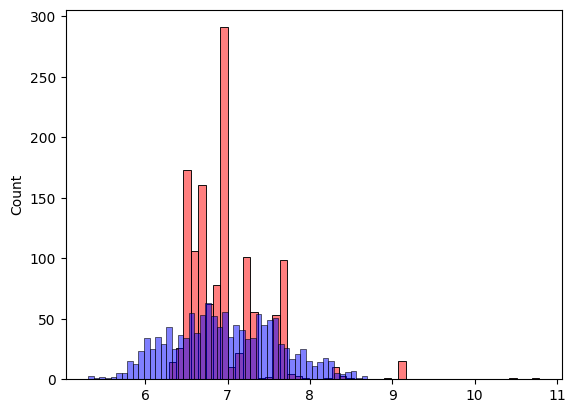

In [102]:
sns.histplot(y_pred_0, color='red', alpha=0.5, bins=50)
sns.histplot(y_train_0, color='blue', alpha=0.5, bins=50)

In [104]:
rmse(y_train_mean, y_pred_mean).round(2)

0.45

In [105]:
# Question 4

In [106]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [107]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [108]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 6.7271637061124805 0.42886353154744117
0.01 6.721004333260219 0.42885163605341076
0.1 6.666075503828108 0.42877560097076395
1 6.162616499461252 0.4305932989743419
5 4.616086176497313 0.4632095257580717
10 3.5167547207936254 0.5075657769236924
100 0.6849263362660136 0.6735026061725846


In [109]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

score

0.42885163605341076

In [110]:
# Question 5

In [129]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

rmse_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [131]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [143]:
y_pred.shape, y_val.shape, y_train.shape

((1296,), (432,), (1296,))

In [147]:
for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

    
    df_train = df_train.fillna(0)
    df_val = df_val.fillna(0)
    
    X_train = df_train[['ram', 'storage', 'screen']].values
    y_train = df_train['final_price'].values
    X_val = df_val[['ram', 'storage', 'screen']].values
    y_val = df_val['final_price'].values

    base = ['ram','storage','screen']
    X_train = df_train[base].values

    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_train.dot(w)
    
       
    def rmse(y, y_pred):
        se = (y - y_pred) ** 2
        mse = se.mean()
        return np.sqrt(mse)

    rmse(y_train, y_pred)
    rmse_scores.append(rmse)

In [149]:
rmse_scores

[<function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>,
 <function __main__.rmse(y, y_pred)>]

In [151]:
rmse_std = np.array(rmse_scores).std
rmse_std

<function ndarray.std>

In [153]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test



idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)


df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop=True)

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
X_full_train

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  256. ,   15.6],
       [  16. ,  512. ,   15.6],
       [  16. ,  512. ,   15.6]])

In [155]:
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

1479.0523752553959

In [159]:
train_linear_regression_reg(X_test, y_pred)

(698.2409458790305, array([ 42.24177046,   0.90752479, -38.72830044]))

In [161]:
rmse(X_test, y_pred)

ValueError: operands could not be broadcast together with shapes (432,3) (432,) 